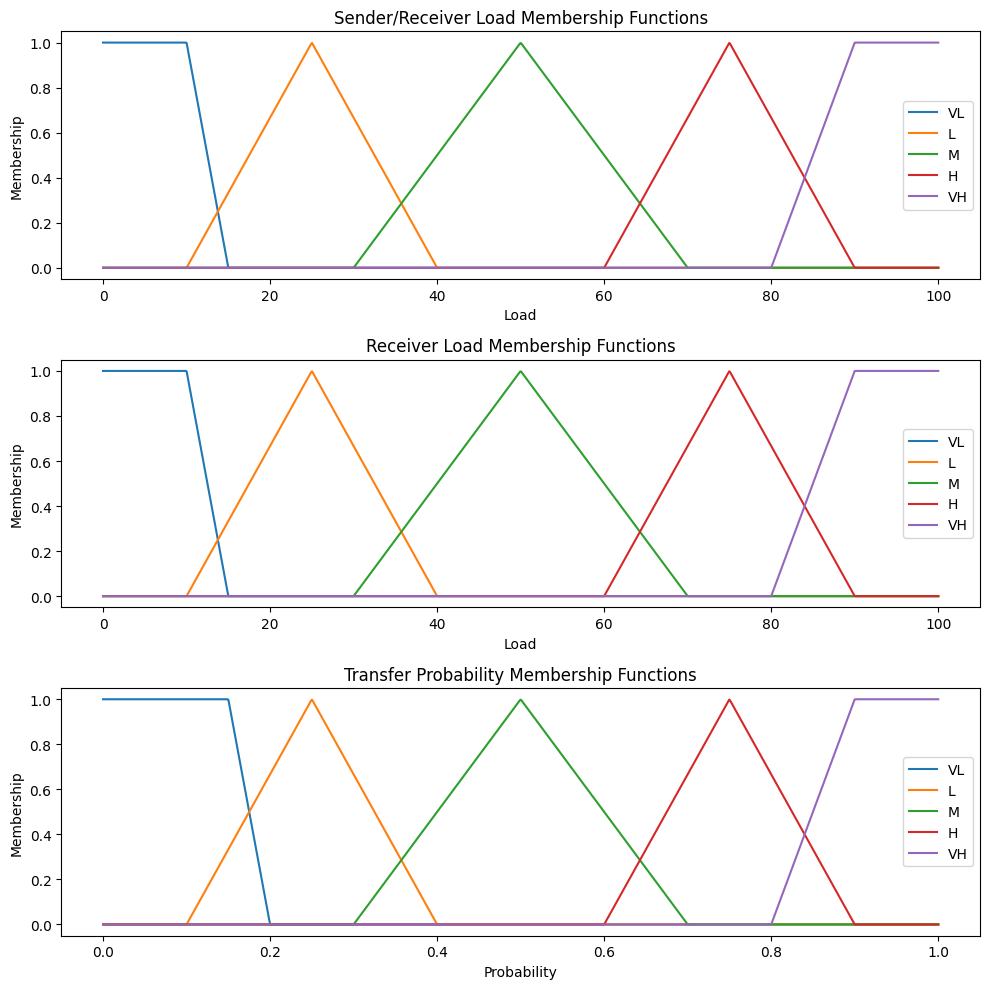

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Membership functions for SenderLoad and ReceiverLoad (range 0-100)
x_load = np.linspace(0, 100, 1000)
VL = fuzz.trapmf(x_load, [0, 0, 10, 15])
L  = fuzz.trimf(x_load, [10, 25, 40])
M  = fuzz.trimf(x_load, [30, 50, 70])
H  = fuzz.trimf(x_load, [60, 75, 90])
VH = fuzz.trapmf(x_load, [80, 90, 100, 100])

# Membership functions for TransferProbability (range 0-1)
x_prob = np.linspace(0, 1, 1000)
VLp = fuzz.trapmf(x_prob, [0.0, 0.0, 0.15, 0.2])
Lp  = fuzz.trimf(x_prob, [0.1, 0.25, 0.4])
Mp  = fuzz.trimf(x_prob, [0.3, 0.5, 0.7])
Hp  = fuzz.trimf(x_prob, [0.6, 0.75, 0.9])
VHp = fuzz.trapmf(x_prob, [0.8, 0.9, 1.0, 1.0])

# Plot membership functions
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

axs[0].plot(x_load, VL, label='VL')
axs[0].plot(x_load, L, label='L')
axs[0].plot(x_load, M, label='M')
axs[0].plot(x_load, H, label='H')
axs[0].plot(x_load, VH, label='VH')
axs[0].set_title('Sender/Receiver Load Membership Functions')
axs[0].legend()
axs[0].set_xlabel('Load')
axs[0].set_ylabel('Membership')

axs[1].plot(x_load, VL, label='VL')
axs[1].plot(x_load, L, label='L')
axs[1].plot(x_load, M, label='M')
axs[1].plot(x_load, H, label='H')
axs[1].plot(x_load, VH, label='VH')
axs[1].set_title('Receiver Load Membership Functions')
axs[1].legend()
axs[1].set_xlabel('Load')
axs[1].set_ylabel('Membership')

axs[2].plot(x_prob, VLp, label='VL')
axs[2].plot(x_prob, Lp, label='L')
axs[2].plot(x_prob, Mp, label='M')
axs[2].plot(x_prob, Hp, label='H')
axs[2].plot(x_prob, VHp, label='VH')
axs[2].set_title('Transfer Probability Membership Functions')
axs[2].legend()
axs[2].set_xlabel('Probability')
axs[2].set_ylabel('Membership')

plt.tight_layout()
plt.show()

# --- Fuzzy Inference Example ---
# Rule table as in your C++ code
rule_table = [
    ["VL", "L", "M", "H", "VH"],
    ["VL", "VL", "L", "M", "H"],
    ["VL", "VL", "VL", "L", "M"],
    ["VL", "VL", "VL", "VL", "L"],
    ["VL", "VL", "VL", "VL", "VL"]
]
levels = ["VL", "L", "M", "H", "VH"]

def fuzzify_load(val):
    return {
        "VL": fuzz.interp_membership(x_load, VL, val),
        "L":  fuzz.interp_membership(x_load, L, val),
        "M":  fuzz.interp_membership(x_load, M, val),
        "H":  fuzz.interp_membership(x_load, H, val),
        "VH": fuzz.interp_membership(x_load, VH, val),
    }

def fuzzify_prob(level, x=x_prob):
    if level == "VL":
        return VLp
    elif level == "L":
        return Lp
    elif level == "M":
        return Mp
    elif level == "H":
        return Hp
    elif level == "VH":
        return VHp
    else:
        return np.zeros_like(x)

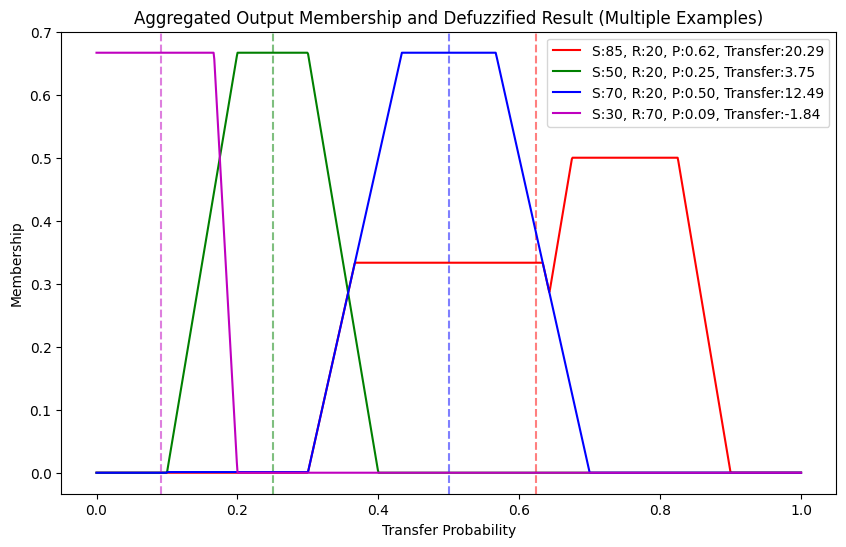

In [26]:

def fuzzy_infer(sender_val, receiver_val):
    sender_mf = fuzzify_load(sender_val)
    receiver_mf = fuzzify_load(receiver_val)
    # Rule firing strengths
    aggregated = np.zeros_like(x_prob)
    for i, rlevel in enumerate(levels):
        for j, slevel in enumerate(levels):
            rule_strength = min(receiver_mf[rlevel], sender_mf[slevel])
            out_level = rule_table[i][j]
            aggregated = np.fmax(aggregated, np.fmin(rule_strength, fuzzify_prob(out_level)))
    # Defuzzify
    prob = fuzz.defuzz(x_prob, aggregated, 'centroid')
    return prob, aggregated

examples = [
    (85, 20),
    (50, 20),
    (70, 20),
    (30, 70),
]

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'm']
for idx, (sender_val, receiver_val) in enumerate(examples):
    prob, aggregated = fuzzy_infer(sender_val, receiver_val)
    plt.plot(x_prob, aggregated, label=f'S:{sender_val}, R:{receiver_val}, P:{prob:.2f}, Transfer:{prob*(sender_val-receiver_val)/2.0:.2f}', color=colors[idx])
    plt.axvline(prob, color=colors[idx], linestyle='--', alpha=0.5)

plt.title('Aggregated Output Membership and Defuzzified Result (Multiple Examples)')
plt.xlabel('Transfer Probability')
plt.ylabel('Membership')
plt.legend()
plt.show()